In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, tqdm
import seaborn as sns
import scipy.io
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import shutil
import matplotlib.pyplot as plt
metadata_df = pd.read_csv("../data/metadata.csv")

In [2]:
metadata_df.loc[metadata_df["Capacity"]=="[]", "Capacity"] = np.nan
metadata_df[metadata_df["Capacity"]=="[]"]["Capacity"]

Series([], Name: Capacity, dtype: float64)

In [3]:
battery_group = {"6": ["B0005", "B0006", "B0007", "B0018"]}

In [4]:
def plot_capacity_boxplot(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    fig, ax = plt.subplots()
    capacity = []
    for cell in cells[group]:
        df = metadata_df[(metadata_df["battery_id"]==cell) & (metadata_df["type"]=="discharge")].copy()
        clist = df[df["Capacity"].notna()]["Capacity"].astype(float).tolist()
        capacity.append(clist)
        # print(len(clist))
        
    ax.boxplot(capacity)
    plt.legend()
    plt.ylim(-0.4,2.9)
    plt.xticks(range(1,len(cells[group]) + 1), cells[group])
    #plt.xlabel("Battery")
    plt.ylabel("Capacity [Ah]")
    plt.rcParams['axes.titley'] = 1.0
    plt.rcParams['axes.titlepad'] = -14
    plt.title(f"Group {group}")
    plt.show()

In [5]:
def plot_capacity_vs_cycle(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    fig, ax = plt.subplots()
    for cell in cells[group]:
        df = metadata_df[(metadata_df["battery_id"]==cell) & (metadata_df["type"]=="discharge")].copy()
        df["Capacity"] = df["Capacity"].astype(float)
        df["cycle"] = range(len(df))
        ax.plot(df["cycle"], df["Capacity"], marker='.', label=cell)
        
    plt.axhline(70.0, color='k', linestyle='--')    
    plt.legend()
    plt.ylim(0,2.49)
    #plt.xlim(0,30)
    plt.xlim(0,199)
    plt.xlabel("Cycle number")
    plt.ylabel("Capacity [Ah]")
    plt.rcParams['axes.titley'] = 1.0
    plt.rcParams['axes.titlepad'] = -14
    plt.title(f"Group {group}")
    plt.show()

In [6]:
def plot_SOH_vs_cycle(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    fig, ax = plt.subplots()
    for cell in cells[group]:
        df = metadata_df[(metadata_df["battery_id"]==cell) & (metadata_df["type"]=="discharge")].copy()
        df["Capacity"] = df["Capacity"].astype(float)/2.0 * 100.0
        df["cycle"] = range(len(df))
        ax.plot(df["cycle"], df["Capacity"], marker='.', label=cell)
        
    plt.axhline(70.0, color='k', linestyle='--')    
    plt.legend()
    plt.ylim(0,119)
    plt.xlim(0,199)
    plt.xlabel("Cycle number")
    plt.ylabel("SOH %")
    plt.rcParams['axes.titley'] = 1.0
    plt.rcParams['axes.titlepad'] = -14
    plt.title(f"Group {group}")
    plt.show()

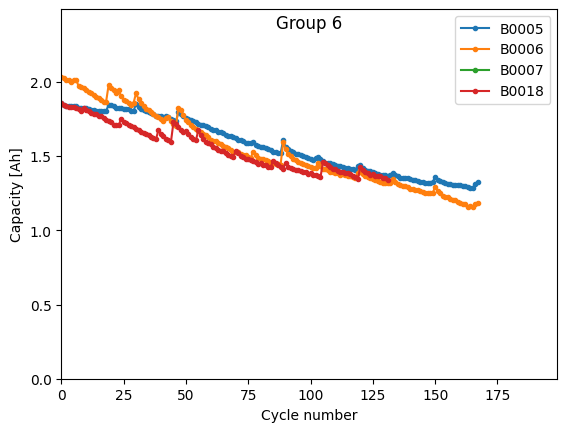

C:\Users\kurt_\AppData\Local\Temp\ipykernel_6124\2454139458.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


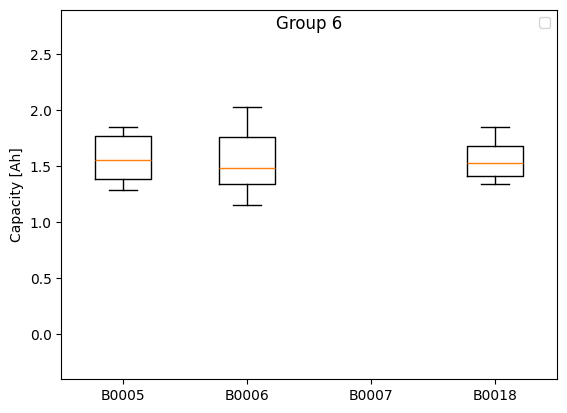

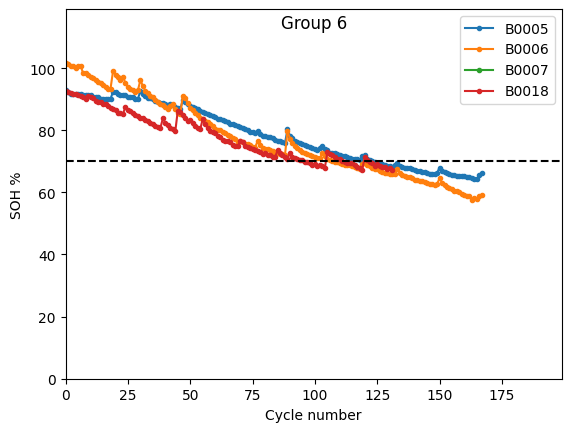

In [7]:
GROUP = "6"
plot_capacity_vs_cycle(battery_group, GROUP)
plot_capacity_boxplot(battery_group, GROUP)
plot_SOH_vs_cycle(battery_group, GROUP)

In [8]:
metadata_df["Group"] = ""
for key in list(battery_group.keys()):
    for cell in battery_group[key]:
        metadata_df.loc[metadata_df["battery_id"]==cell, "Group"] = key
    
metadata_df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,Group
0,charge,2008-04-02 13:08:17,24,B0005,0,1,00001.csv,NaN,NaN,NaN,6
1,discharge,2008-04-02 15:25:41,24,B0005,1,2,00002.csv,1.856487,NaN,NaN,6
2,charge,2008-04-02 16:37:51,24,B0005,2,3,00003.csv,NaN,NaN,NaN,6
3,discharge,2008-04-02 19:43:48,24,B0005,3,4,00004.csv,1.846327,NaN,NaN,6
4,charge,2008-04-02 20:55:40,24,B0005,4,5,00005.csv,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...
1546,impedance,2008-08-20 01:34:44,24,B0018,314,1547,01547.csv,NaN,0.066069,0.088959,6
1547,charge,2008-08-20 02:06:37,24,B0018,315,1548,01548.csv,NaN,NaN,NaN,6
1548,discharge,2008-08-20 05:02:00,24,B0018,316,1549,01549.csv,1.354797,NaN,NaN,6
1549,charge,2008-08-20 05:49:31,24,B0018,317,1550,01550.csv,NaN,NaN,NaN,6


In [9]:
# battery_ids = metadata_df["battery_id"].value_counts().index
battery_ids = ['B0005', 'B0006', 'B0018']

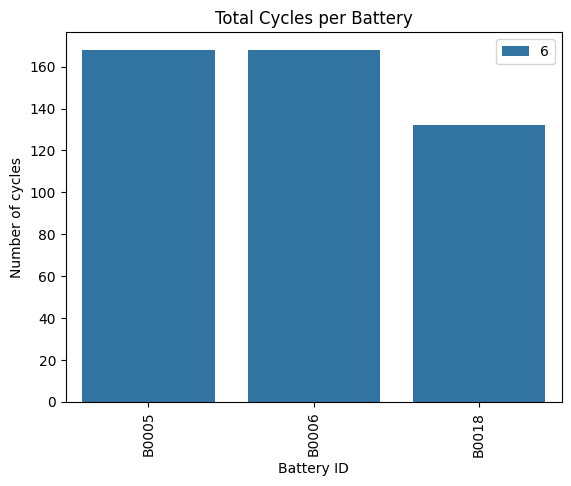

In [10]:
plt.rcParams.update(plt.rcParamsDefault)
sns.countplot(data=metadata_df[metadata_df["type"]=="discharge"], x="battery_id", order=battery_ids, dodge=False, hue=metadata_df["Group"])
plt.tick_params(axis='x', rotation=90)
plt.ylabel("Number of cycles")
plt.xlabel("Battery ID")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = list(range(len(handles)))
plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           loc="upper right")

plt.title('Total Cycles per Battery')
plt.show()

In [11]:
def plot_battery_cycles(metadata_df, battery_id, cycle_type, y_col, ylim, xlim, ylabel, title_suffix):

    filenames = metadata_df[(metadata_df["battery_id"]==battery_id) & 
                            (metadata_df["type"]==cycle_type)]['filename'].tolist()
    
    if not filenames:
        return
    
    cycle = 1
    N = len(filenames)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
    fig, ax = plt.subplots()
    for filename in filenames:
        battery_data = pd.read_csv("../data/cleaned_dataset/" + filename) 
        ax.plot(battery_data["Time"], battery_data[y_col], marker='.', label=cycle)
        cycle += 1
    
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel("Time [s]")
    plt.ylabel(ylabel)
    plt.title(f"{battery_id} - {title_suffix} on {cycle_type.capitalize()}")
    plt.show()

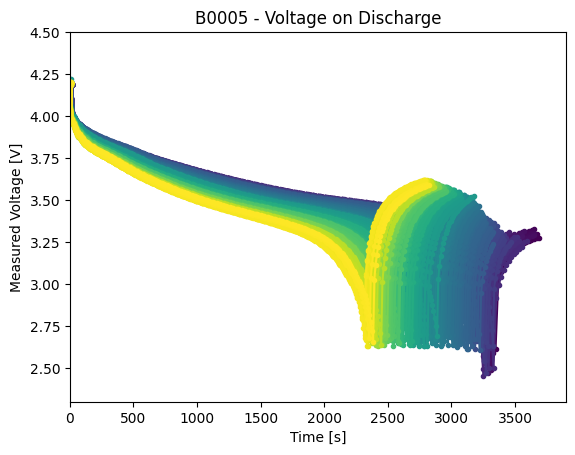

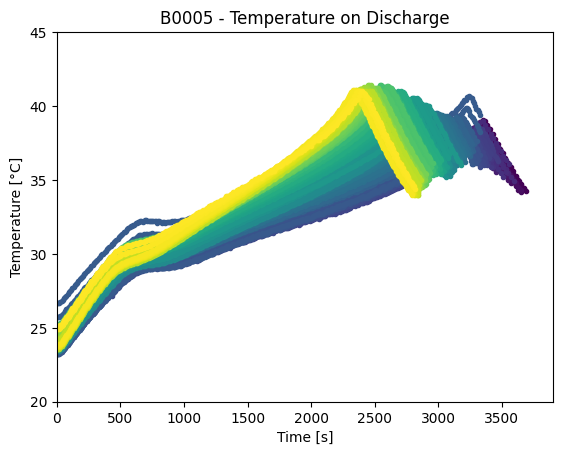

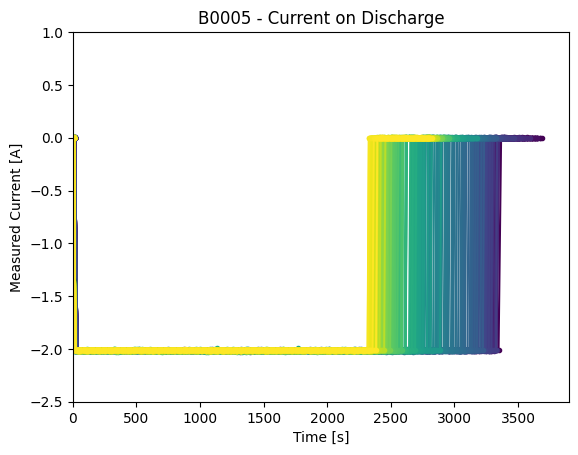

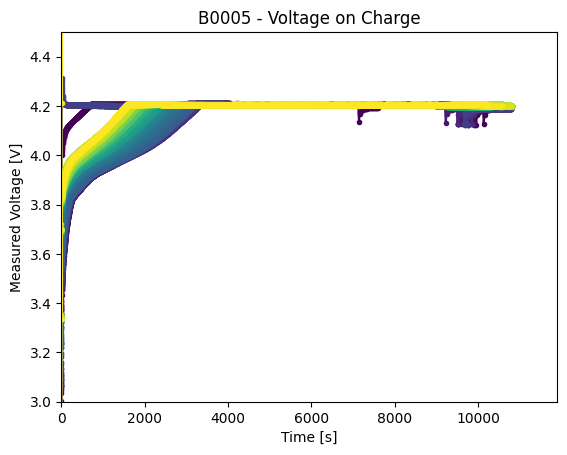

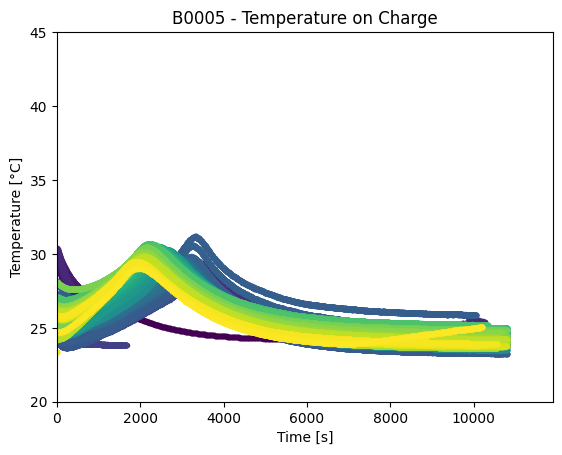

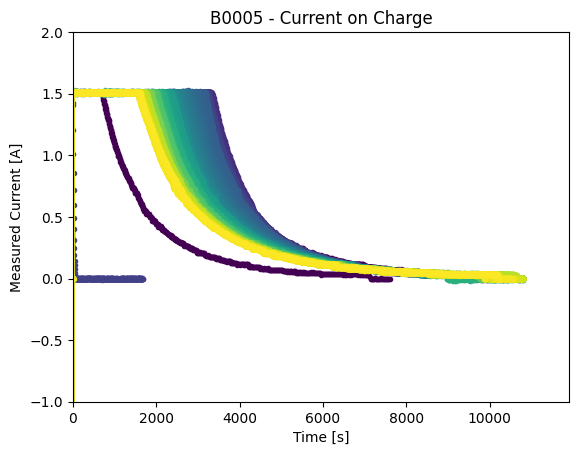

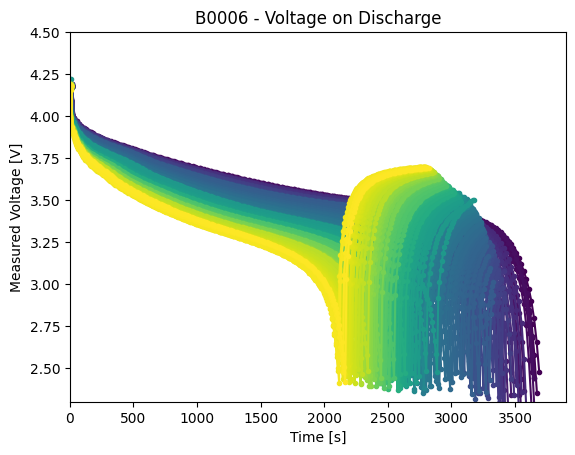

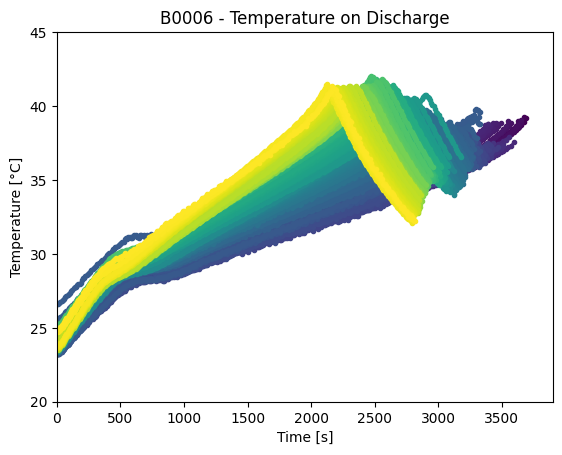

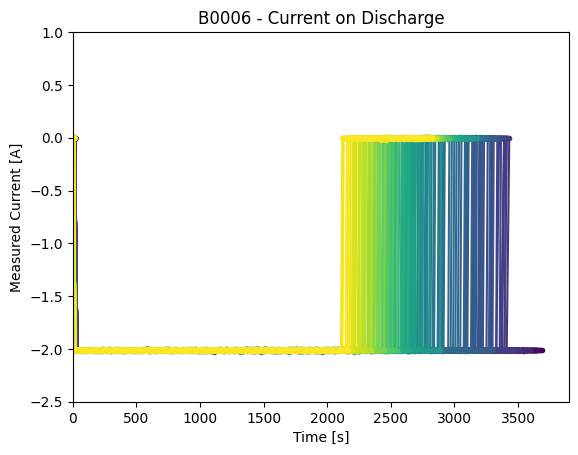

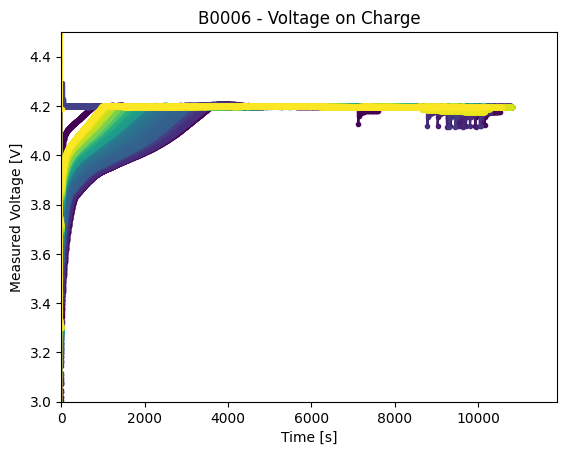

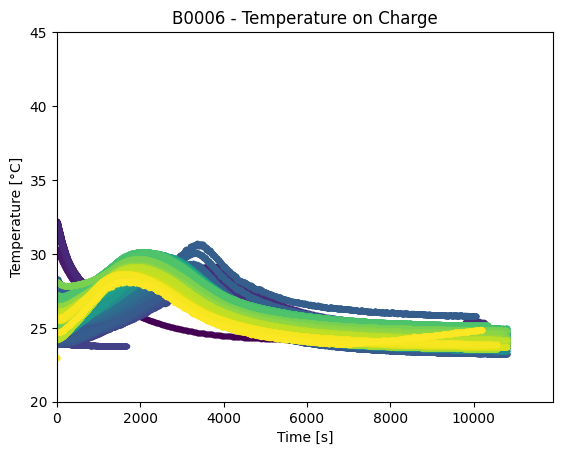

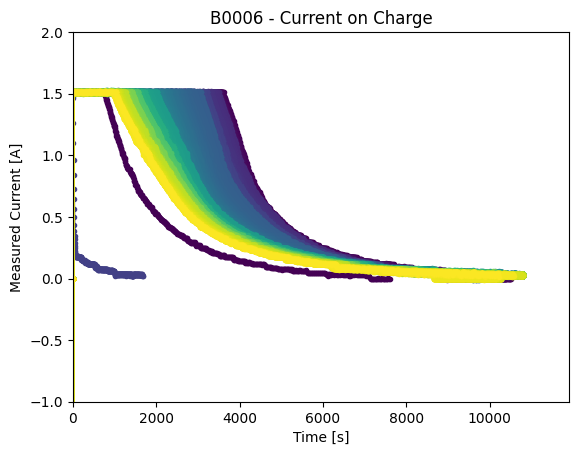

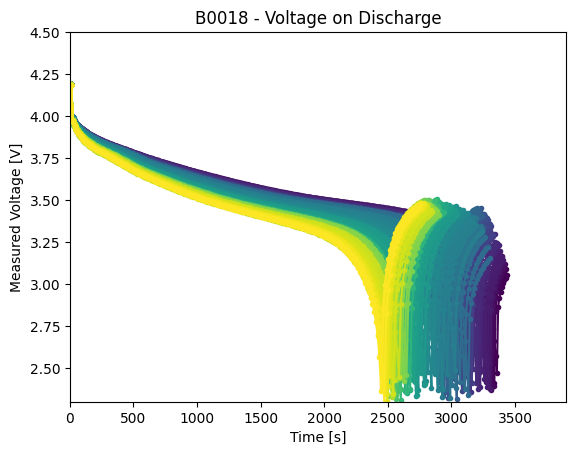

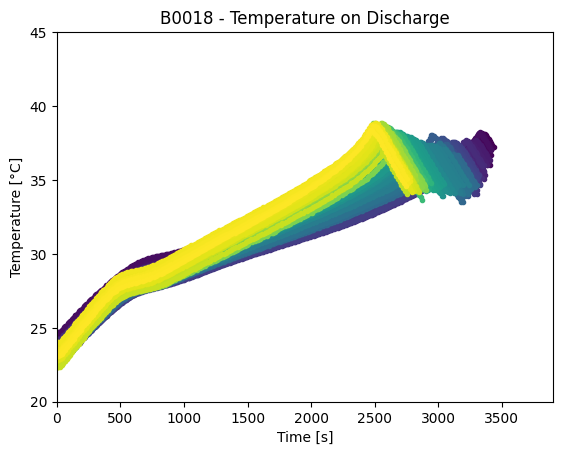

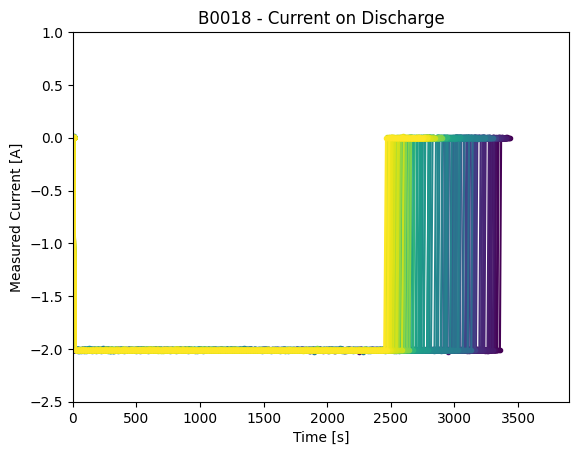

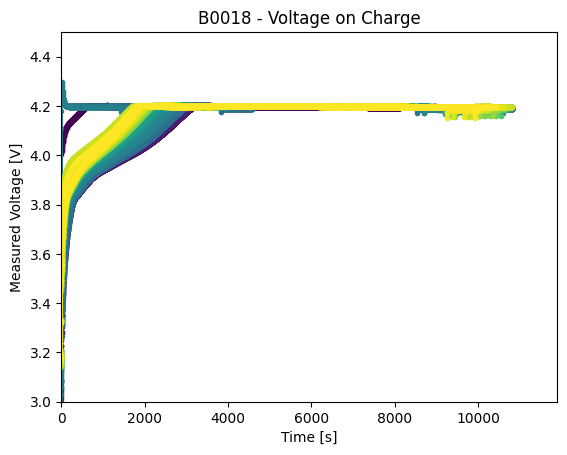

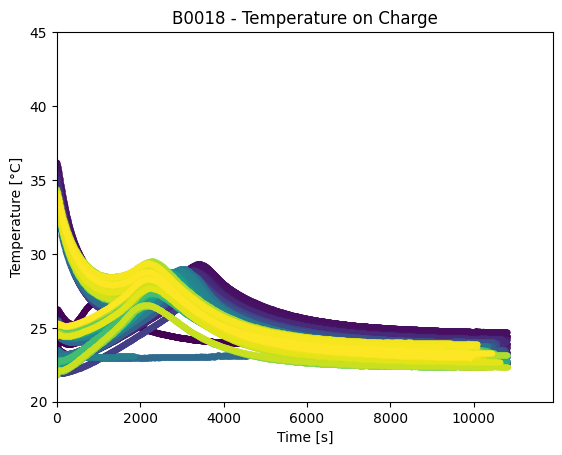

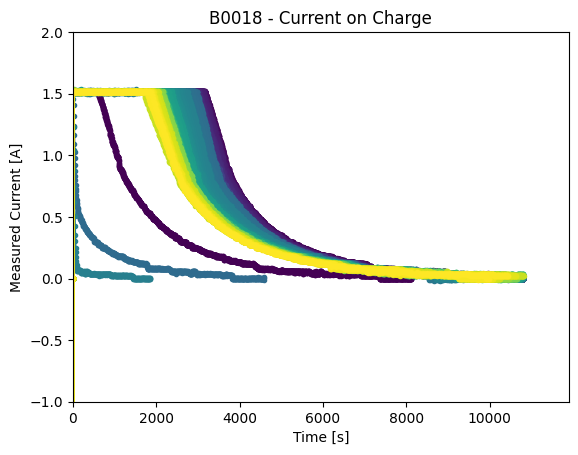

In [12]:
for BID in battery_ids:
    # discharge
    plot_battery_cycles(metadata_df, BID, "discharge", "Voltage_measured", (2.3,4.5), (0,3900), "Measured Voltage [V]", "Voltage")
    plot_battery_cycles(metadata_df, BID, "discharge", "Temperature_measured", (20,45), (0,3900), "Temperature [°C]", "Temperature")
    plot_battery_cycles(metadata_df, BID, "discharge", "Current_measured", (-2.5,1), (0,3900), "Measured Current [A]", "Current")

    # charge
    plot_battery_cycles(metadata_df, BID, "charge", "Voltage_measured", (3,4.5), (0,11900), "Measured Voltage [V]", "Voltage")
    plot_battery_cycles(metadata_df, BID, "charge", "Temperature_measured", (20,45), (0,11900), "Temperature [°C]", "Temperature")
    plot_battery_cycles(metadata_df, BID, "charge", "Current_measured", (-1,2), (0,11900), "Measured Current [A]", "Current")

In [13]:
def plot_group_correlation_heatmap_from_files(metadata_df, cells: dict, group: str, cycle_type="discharge"):
    dfs = []
    for cell in cells[group]:
        files = metadata_df[(metadata_df["battery_id"]==cell) & 
                            (metadata_df["type"]==cycle_type)]["filename"].tolist()
        for f in files:
            filepath = os.path.join("..", "data", "cleaned_dataset", f)
            if os.path.exists(filepath):
                df = pd.read_csv(filepath)
                df["battery_id"] = cell
                dfs.append(df)
            else:
                print(f"Dosya bulunamadı: {filepath}")
    
    if len(dfs) == 0:
        print("Hiç CSV bulunamadı. Heatmap çizilemiyor.")
        return

    combined = pd.concat(dfs, ignore_index=True)
    cols = ["Voltage_measured", "Current_measured", "Temperature_measured"]
    cols = [c for c in cols if c in combined.columns]
    corr = combined[cols].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap ({cycle_type.capitalize()}) - Group {group}")
    plt.show()

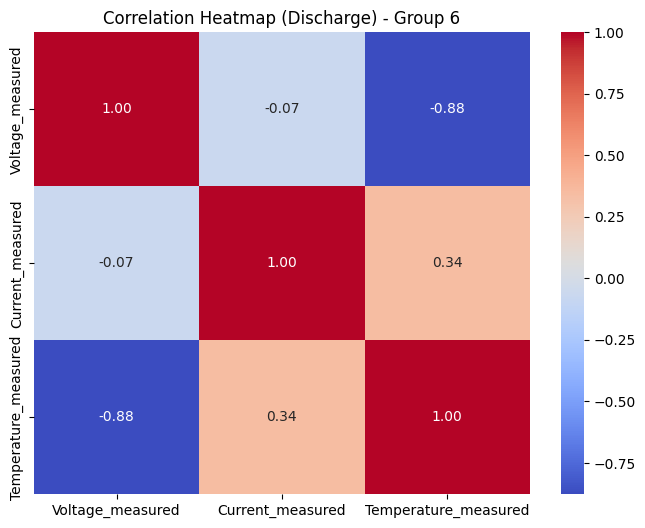

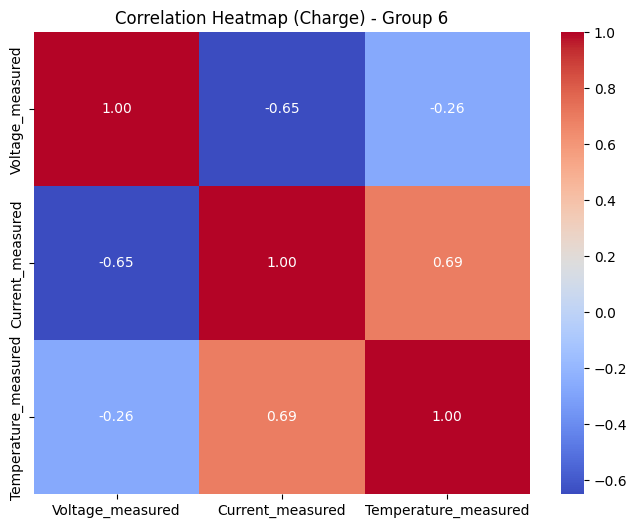

In [14]:
plot_group_correlation_heatmap_from_files(metadata_df, battery_group, "6", cycle_type="discharge")
plot_group_correlation_heatmap_from_files(metadata_df, battery_group, "6", cycle_type="charge")